# Prediction using Supervised ML 

## Importing Required Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## DATA Preprocessing

**TASK**

The Following tasks will be performed with the help of Python and relevant packages

* Predict the percentage of an student based on the no. of study hours.
* This is a simple linear regression task as it involves just 2 variables
* What will be predicted score if a student studies for 9.25 hrs/ day? 



In [2]:
# Loading the Data
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv") #Link contains data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Our Data has two 2 fields, **"Hours"** which is of **float** datatype and **"Scores"** which is of **integer** datatype.

There are **25 entries** in the csv file.

In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The **Maximum score** obtained by any student in our data is **95**, but the **average is 51**, which means the class has a good variation in student types. Note that **less number of study hours might not be the only reason for a student to score less marks.**

It is also mentioned that he **maximum amount of time a student has studied is 9.2 hours**

In [4]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


We are able to see that the Scores is **97% Pearson correlated** with the Hours field in the dataset, which is only obvious. But, **note that the remaining 3% also matters and can at the worst or best affect the student's performance adversly**.

## Exploratory Data Analysis

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <a list of 10 Patch objects>)

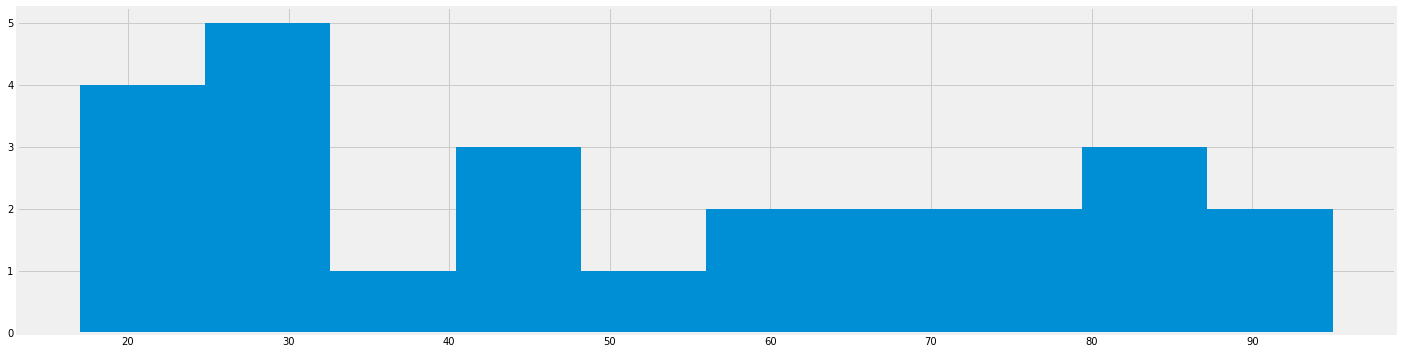

In [5]:
plt.figure(figsize=(22,6))
plt.hist(df["Scores"])

We are able to see that many students have scored less than 50, which also means that there might have been a problem with the quality of the teaching.

It might also mean, that the students in this dataset have been taught by different teachers. Some were provided good quality education, whereas some were not.

Text(0, 0.5, 'Score')

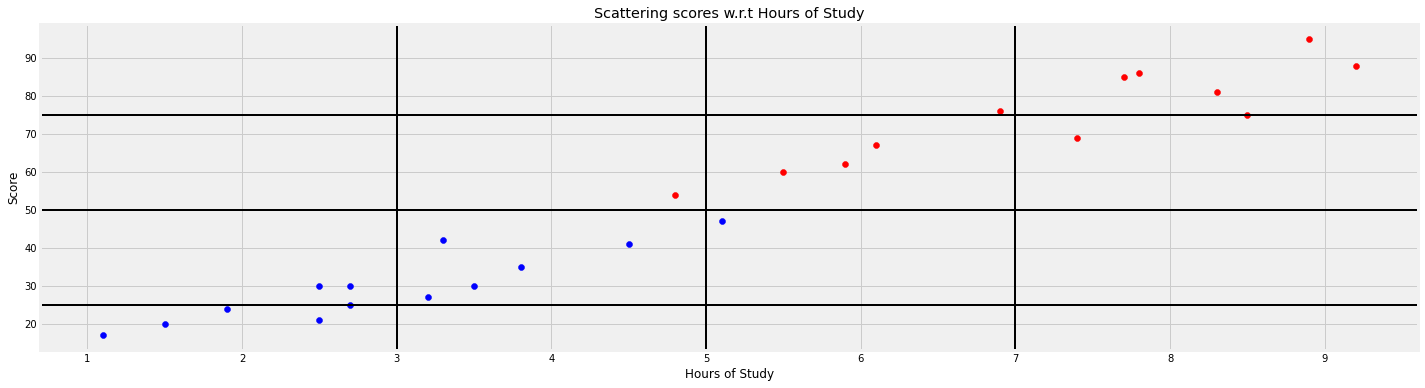

In [6]:
plt.figure(figsize=(22,6))
plt.scatter(df["Hours"],df["Scores"].where(df["Scores"] > 50),c='r')
plt.scatter(df["Hours"],df["Scores"].where(df["Scores"] <= 50),c='b')
plt.axhline(y=75,c='black',linewidth = 2)
plt.axhline(y=50,c='black',linewidth = 2)
plt.axhline(y=25,c='black',linewidth = 2)
plt.axvline(x=3,c='black',linewidth = 2)
plt.axvline(x=5,c='black',linewidth = 2)
plt.axvline(x=7,c='black',linewidth = 2)
plt.title("Scattering scores w.r.t Hours of Study")
plt.xlabel("Hours of Study")
plt.ylabel("Score")

From the above scatterplot we are able to see that,

* Students who **study more than 7 hours** have **almost always crossed the 75 mark in scores**.

* On an **Average a study time of 5 hours** gives a **50+  result** to most of the students.

* Students who **studied less than 5 hours**, have **failed to cross the 50+ mark**.

* There are some outliers:
  * There is a student who studied for less than 5 hours, but still managed to  score 50+(but **only barely** 50+).
  *  There is a student who has obtained less than 50, even after studying more than 5 hours. 
  
  (This proves the fact that, **no. of study hours is an important but, not the only factor**, that comes in to play when deciding the student's marks)

In [7]:
X = df.iloc[:,0].values # X contains hours column data
y = df.iloc[:,1].values # y contains scores column data 
X = X.reshape(-1,1)

In [8]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.2,random_state=0)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(20, 1) (5, 1) (20,) (5,)


In [9]:
#Importing the sklearn model for Linear Regression (This can also be done with the help of tensorflow, I am using sklearn for simplicity)
from sklearn.linear_model import LinearRegression

#Creating a Regression Object
regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Score')

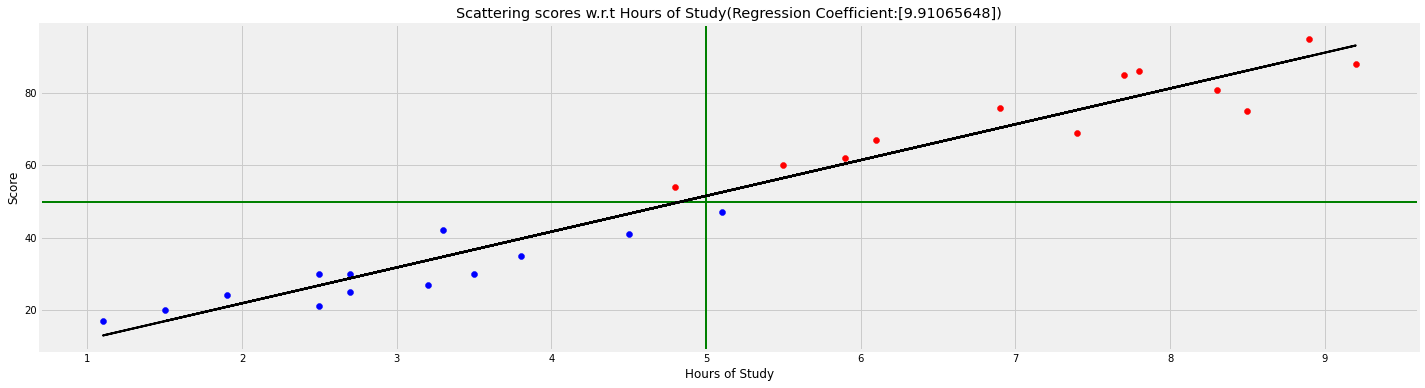

In [10]:
plt.figure(figsize=(22,6))
plt.scatter(df["Hours"],df["Scores"].where(df["Scores"] > 50),c='r')
plt.scatter(df["Hours"],df["Scores"].where(df["Scores"] <= 50),c='b')
plt.axhline(y=50,c='g',linewidth = 2)
plt.axvline(x=5,c='g',linewidth = 2)
plt.plot(X,regressor.coef_*X + regressor.intercept_,linewidth=2,c = 'black')
plt.title("Scattering scores w.r.t Hours of Study(Regression Coefficient:{})".format(regressor.coef_))
plt.xlabel("Hours of Study")
plt.ylabel("Score")

The Model has fit well on the given data.

## Evaluating the Model

In [11]:
from sklearn.metrics import mean_absolute_error as mae
y_pred = regressor.predict(X_test)

print("The Mean Absolute Error of the model:",mae(y_test,y_pred))

The Mean Absolute Error of the model: 4.183859899002982


## Predicting Output

In [12]:
def score_calculator(h):
  print('The Student will most likely get: {} marks'.format(int(regressor.predict([[h]])[0])))

In [13]:
score_calculator(4)

The Student will most likely get: 41 marks


In [14]:
score_calculator(5.5)

The Student will most likely get: 56 marks


In [15]:
score_calculator(7)

The Student will most likely get: 71 marks


In [16]:
score_calculator(9.25)

The Student will most likely get: 93 marks


In [17]:
#score_calculator(6)

Therefore, by the above linear model, it is safe to conclude that a student who has studied for 9.25 hours will most likely get 92 marks in his exams.